<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/03_04_skylines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
rects = [(3, 13, 9), (1, 11, 5), (19, 18, 22), (3, 6, 7), (16, 3, 25), (12, 7, 16)]

In [54]:
def toRect(rect):
  g, h, d = rect
  return [(g, 0),(g, h),(d, h),(d, 0)]

In [55]:
r0 = toRect(rects[0])
r0

[(3, 0), (3, 13), (9, 13), (9, 0)]

In [56]:
import matplotlib.pyplot as plt

In [57]:
print(r0)
print(*r0)
print(list(zip(*r0)))

[(3, 0), (3, 13), (9, 13), (9, 0)]
(3, 0) (3, 13) (9, 13) (9, 0)
[(3, 3, 9, 9), (0, 13, 13, 0)]


In [58]:
x, y = zip(*r0)
print(x)
print(y)

(3, 3, 9, 9)
(0, 13, 13, 0)


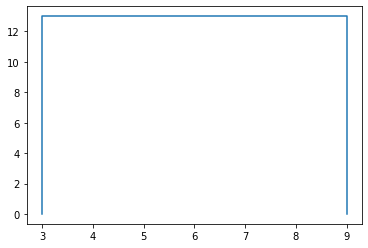

In [59]:
plt.plot(x, y)

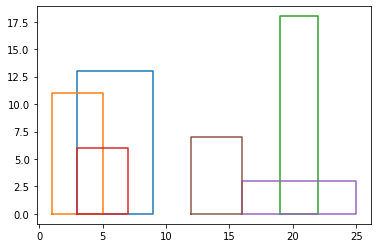

In [60]:
for ri in rects:
  rect = toRect(ri)
  rect.append(rect[0])
  x, y = zip(*rect)
  plt.plot(x, y)
plt.show()

In [61]:
def toContour(rect):
  g, h, d = rect
  return [(g, h), (d, 0)]

In [62]:
r0

[(3, 0), (3, 13), (9, 13), (9, 0)]

In [63]:
c0 = toContour(rects[0])
c0

[(3, 13), (9, 0)]

In [64]:
def drawRect(rect):
  r0 = rect + [rect[0]]
  x, y = zip(*r0)
  plt.plot(x, y, "--")

In [65]:
def drawContour(contour):
  points = [(0, 0)]
  for x, y in contour:
    points.append((x, points[-1][1]))
    points.append((x, y))

  x, y = zip(*points)
  plt.plot(x, y, lw=3)

In [66]:
r0 = toRect(rects[0])
c0 = toContour(rects[0])
r1 = toRect(rects[1])
c1 = toContour(rects[1])

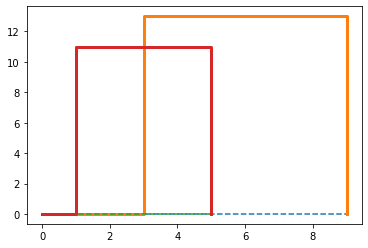

In [67]:
drawRect(r0)
drawContour(c0)
drawRect(r1)
drawContour(c1)

plt.show()

In [68]:
def addPoint(cf, x, y):
  if len(cf) > 1:
    if cf[-1][0] == x:
      cf[-1] = (x, max(y, cf[-1][1]))
      return
    elif cf[-1][1] == y:
      return

  cf.append((x, y))

In [69]:
def merge(c0, c1):
  cf = []
  n0, n1 = len(c0), len(c1)
  i0, i1 = 0, 0
  y0, y1 = 0, 0
  while i0 < n0 or i1 < n1:
    if i1 >= n1 or i0 < n0 and c0[i0][0] <= c1[i1][0]:
      x, y0 = c0[i0]
      i0 += 1
    else:
      x, y1 = c1[i1]
      i1 += 1
    y = max(y0, y1)
    addPoint(cf, x, y)

  return cf

[(1, 11), (3, 13), (9, 0)]


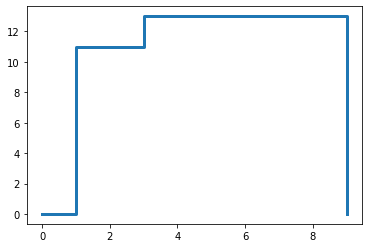

In [70]:
cf = merge(c0, c1)
print(cf)
drawContour(cf)

[(1, 11), (3, 13), (9, 0), (12, 7), (16, 3), (19, 18), (22, 3), (25, 0)]


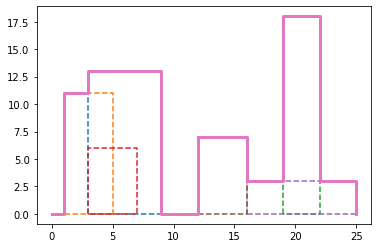

In [71]:
cf = toContour(rects[0])
drawRect(toRect(rects[0]))
for i in range(1, len(rects)):
  drawRect(toRect(rects[i]))
  cf = merge(cf, toContour(rects[i]))
print(cf)
drawContour(cf)

In [72]:
def skyline(rects, i, f):
  if i == f:
    return toContour(rects[i])
  else:
    mid = (i + f)//2
    c0 = skyline(rects, i, mid)
    c1 = skyline(rects, mid+1, f)
    return merge(c0, c1)

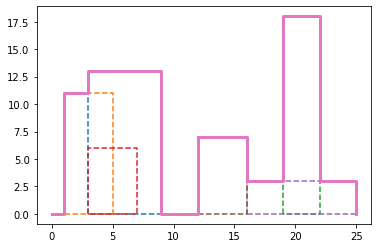

In [73]:
cf2 = skyline(rects, 0, len(rects)-1)
for rect in rects:
  drawRect(toRect(rect))
drawContour(cf2)
plt.show()